In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
from google.colab import files
files.upload()

Saving waterQuality (1).csv to waterQuality (1) (1).csv


{'waterQuality (1) (1).csv': b'aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe\n1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.2,0.0,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0\n2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.9,0.65,0.65,0.1,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0\n1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0\n1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.71,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0\n0.92,24.33,0.03,0.2,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.9,2.41,0.02,0.06,0.02,1.0\n0.94,14.47,0.03,2.88,0.003,0.8,0.43,1.38,0.11,0.67,0.67,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1.0\n2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,0.007,0.021,18.6,1.78,0.007,45.34,2.84,0.1,0.24,0.08,0.0\n3.93,19.87,0.04,0.66,0.001,6.2

In [30]:
data=pd.read_csv('waterQuality (1).csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


In [31]:
data.tail()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7991,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7992,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7993,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7994,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1.0
7995,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [33]:
data.describe()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [34]:
# 1. Basic Descriptive Statistics
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
          aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497 

This code will list only the columns that contain missing values. If there are no missing values, it will return an empty result. Let me know if you need more help!

In [35]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 Series([], dtype: int64)


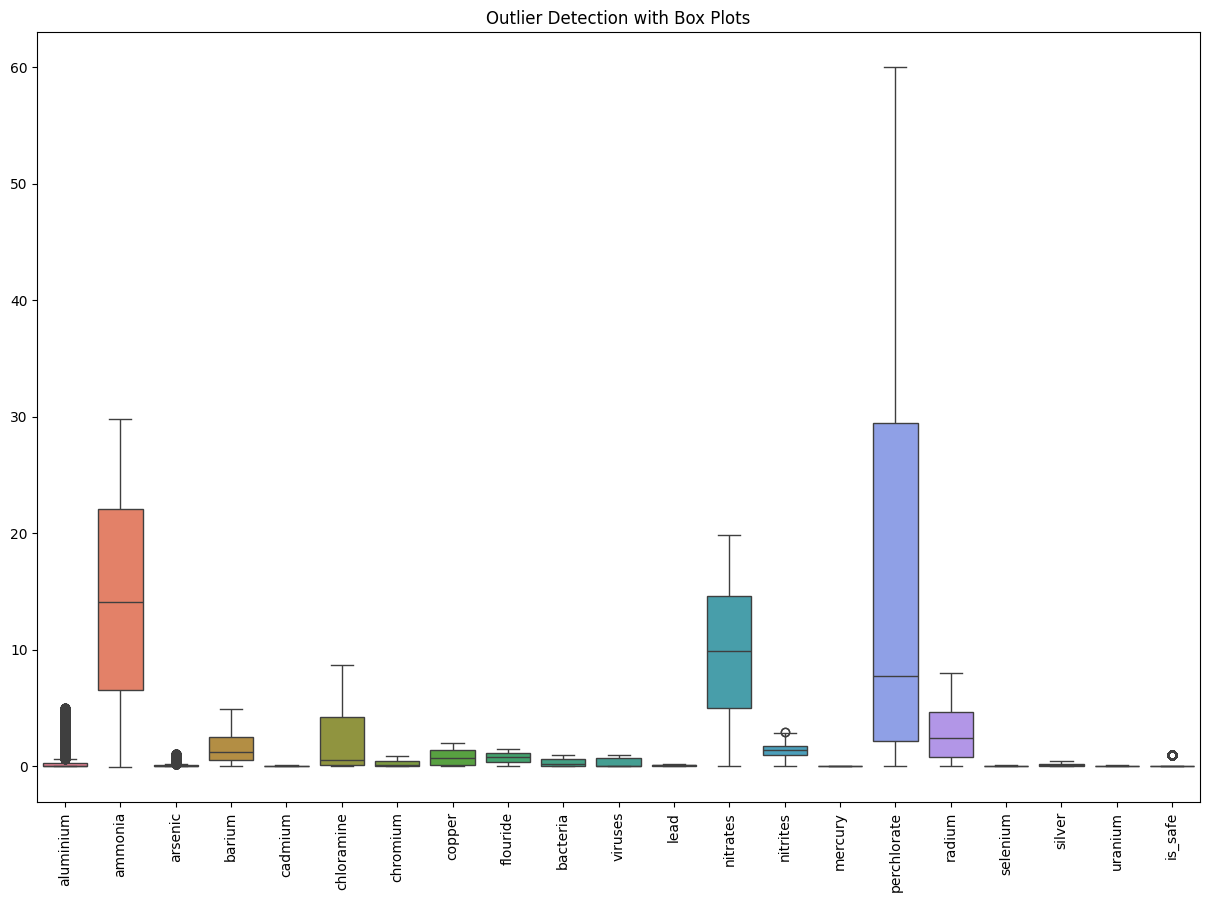

In [36]:

# 3. Outlier Detection with Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Outlier Detection with Box Plots")
plt.show()

In [37]:

# Replace any instances of '#NUM!' with NaN
data.replace('#NUM!', np.nan, inplace=True)

# Convert all columns to numeric, forcing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if you prefer imputation, you can do that here instead)
data.dropna(inplace=True)


In [38]:
data.dtypes


,0
aluminium,float64
ammonia,float64
arsenic,float64
barium,float64
cadmium,float64
chloramine,float64
chromium,float64
copper,float64
flouride,float64
bacteria,float64


In [39]:
x= data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]

In [40]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

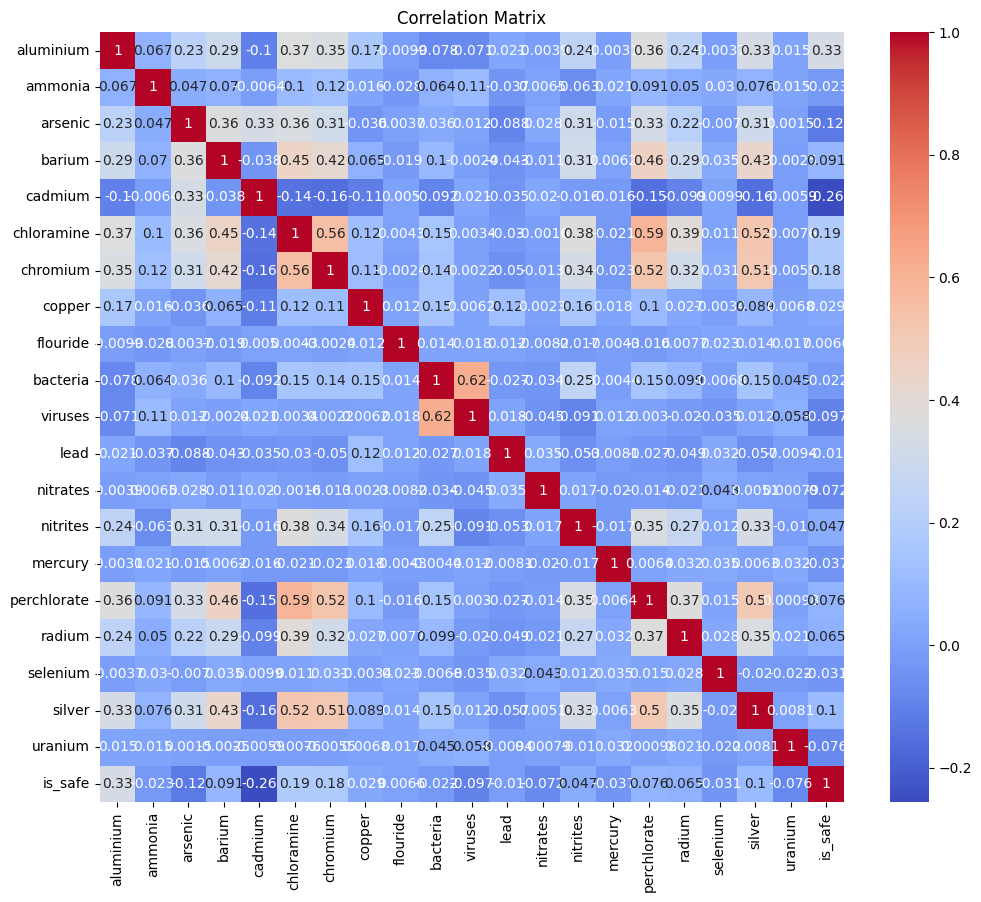

In [41]:
# 4. Correlation Matrix with Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

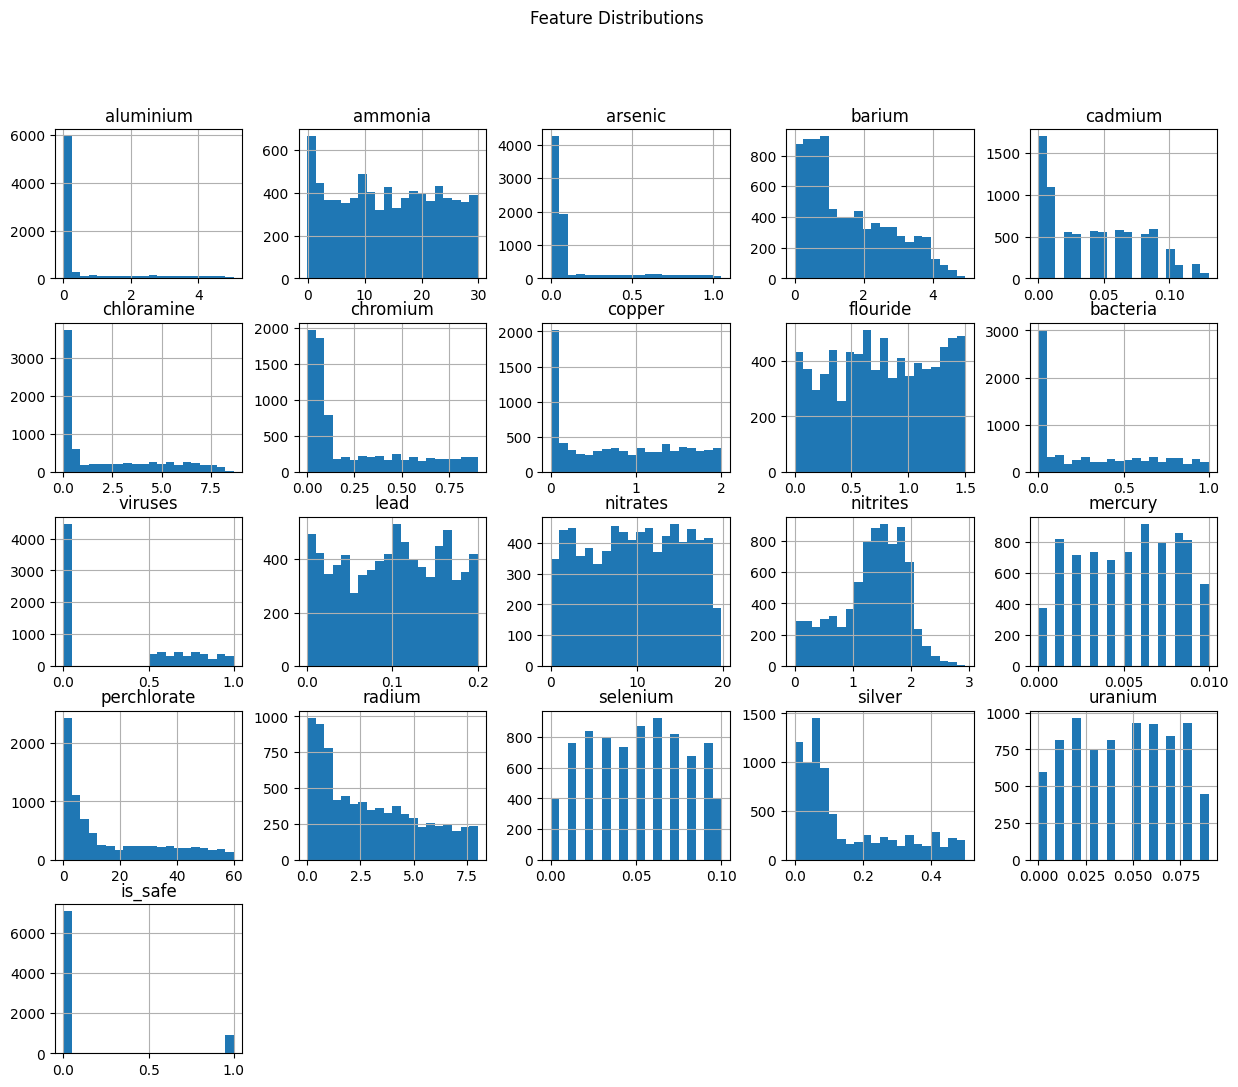

In [42]:
# 5. Histograms for Feature Distributions
data.hist(figsize=(15, 12), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


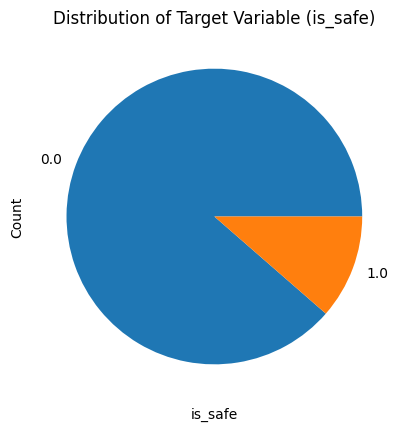

In [43]:
# 6. Target Variable Distribution
data['is_safe'].value_counts().plot(kind='pie')
plt.title("Distribution of Target Variable (is_safe)")
plt.xlabel("is_safe")
plt.ylabel("Count")
plt.show()


#**Random_Forest_Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

#**Prediction**

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [63]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

In [64]:
ypred = rf.predict(xtest)
ypred_prob = rf.predict_proba(xtest)[:, 1]

In [65]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')
f1 = f1_score(ytest, ypred, average='weighted')

In [66]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(ytest, ypred))

# Plot ROC curve

Logistic Regression Results:
Accuracy: 0.9507389162561576
Precision: 0.9509941966553448
Recall: 0.9507389162561576
F1 Score: 0.9465441525350948

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      2300
         1.0       0.96      0.65      0.77       339

    accuracy                           0.95      2639
   macro avg       0.95      0.82      0.87      2639
weighted avg       0.95      0.95      0.95      2639



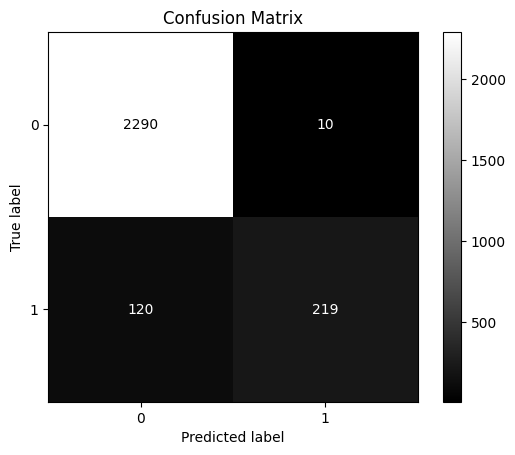

In [68]:
# Generate and display the confusion matrix
cm = confusion_matrix(ytest, ypred)
ConfusionMatrixDisplay(cm).plot(cmap='gray')
plt.title('Confusion Matrix')
plt.show()


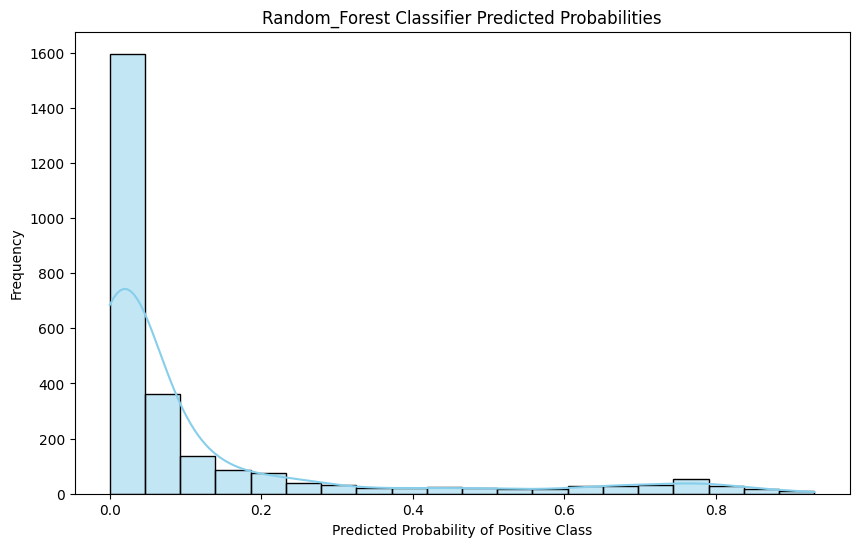

In [69]:
# Get probability estimates
yprob = rf.predict_proba(xtest)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(yprob, kde=True, bins=20, color='skyblue')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.title('Random_Forest Classifier Predicted Probabilities')
plt.show()


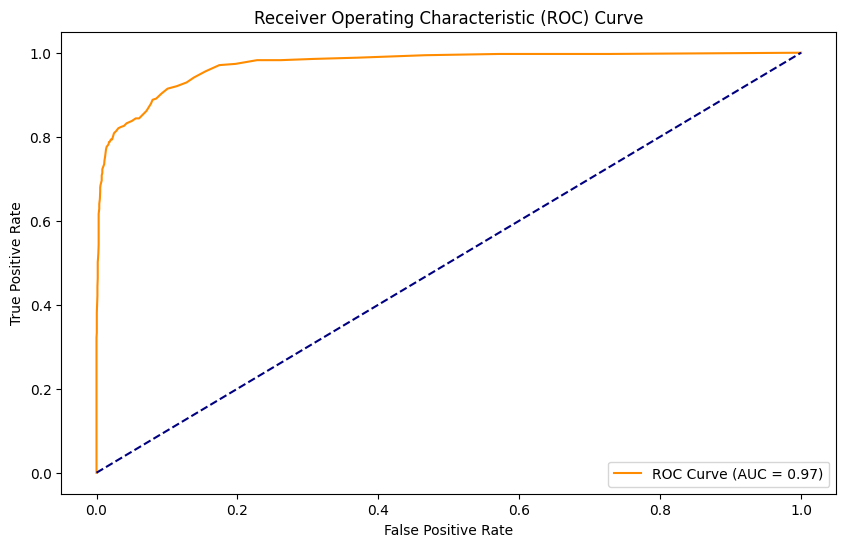

In [70]:
# Get the predicted probabilities for the positive class
yprob = rf.predict_proba(xtest)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(ytest, yprob)
auc_score = roc_auc_score(ytest, yprob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<ipython-input-72-a1258e8a4c5b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


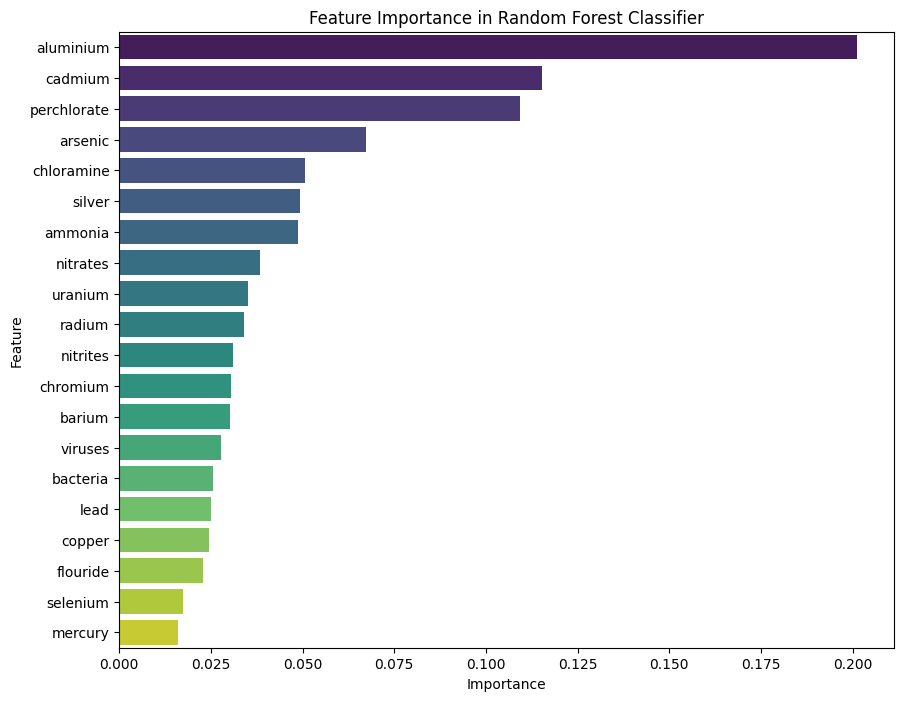

In [72]:
# Plotting feature importance
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance in Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()